In [1]:
#Step1: Import necessary libraries and packages
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
#Step 2: Dataset consists of sms text and whether that is a spam sms or non-spam sms
df = pd.read_csv('/content/sms_spam.csv') #Note: Need to provide proper path of the dataset
df.head()

,Unnamed: 0,label,sms
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#Task 1: Show total number of rows and columns as number of records and fields resp
print("Number of records: ", df.shape[0])
print("Number of fields: ", df.shape[1])

Number of records:  5572
Number of fields:  3


In [4]:
#Task 2: Show the contents under 'sms' column
df['sms']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object

In [5]:
#Task 3: Any dataset, scraped from html contains a number of \xa0 unicode.
#This non-breaking space in Latin1 (ISO 8859-1) needs to be replaced with a space
df['sms'] = df['sms'].apply(lambda x: x.replace(u'\xa0',u' '))
df['sms'] = df['sms'].apply(lambda x: x.replace('\u200a',' '))

df['sms'] = df['sms'].apply(lambda x: x.replace(u'&lt;#&gt;',u' '))
df['sms'] = df['sms'].apply(lambda x: x.replace(u'Â;',u' '))

In [6]:
#Step 3: Tokenization and indexing each word:
#Tokens can be words, paragraphs, sentences, punctuations, etc.
#"Low-level tokens" are the unigrams in these words which doesn’t make sense while "High-level tokens" are the complete words
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(df['sms'])
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)
print("\n Word: ID")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("entry: ", tokenizer.word_index['entry'])
print("Until: ", tokenizer.word_index['until'])

Total number of words:  9011

 Word: ID
<oov>:  1
entry:  490
Until:  472


In [7]:
#Step 4: Transforms each text in texts to a sequence of integers.
input_sequences = []
for line in df['sms']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  82480


In [8]:
# Step5: pad sequences: To make length of every title same
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [9]:
# Step 6: create features and label. Last element of all sequences as a label and then perform onehot encoding
##Multi-class classification
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [10]:
print(xs[5])
print(labels[5])
print(ys[5][14])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   48  472 4437  843  756  659]
63
0.0


In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) #100 is output_dimension
model.add(Bidirectional(LSTM(150))) #150 nodes
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=50, verbose=1)
#print model.summary()
print(model)

Epoch 1/50
2578/2578 [==============================] - 106s 38ms/step - loss: 6.9132 - accuracy: 0.0409
Epoch 2/50
2578/2578 [==============================] - 64s 25ms/step - loss: 6.0108 - accuracy: 0.0881
Epoch 3/50
2578/2578 [==============================] - 63s 25ms/step - loss: 5.3370 - accuracy: 0.1383
Epoch 4/50
2578/2578 [==============================] - 62s 24ms/step - loss: 4.7708 - accuracy: 0.1887
Epoch 5/50
2578/2578 [==============================] - 63s 25ms/step - loss: 4.2871 - accuracy: 0.2382
Epoch 6/50
2578/2578 [==============================] - 61s 24ms/step - loss: 3.8713 - accuracy: 0.2845
Epoch 7/50
2578/2578 [==============================] - 62s 24ms/step - loss: 3.5052 - accuracy: 0.3349
Epoch 8/50
2578/2578 [==============================] - 60s 23ms/step - loss: 3.1869 - accuracy: 0.3812
Epoch 9/50
2578/2578 [==============================] - 61s 24ms/step - loss: 2.9038 - accuracy: 0.4254
Epoch 10/50
2578/2578 [==============================] - 61s 23

After 50th epoch, accuracy achieved is 0.8995

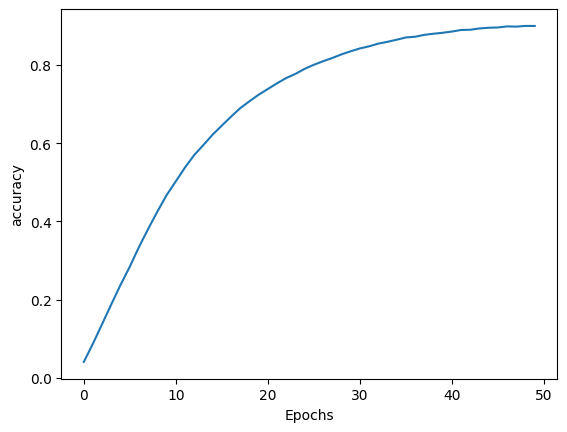

In [12]:
#Step 7: Plotting model accuracy and loss
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
plot_graphs(history, 'accuracy')

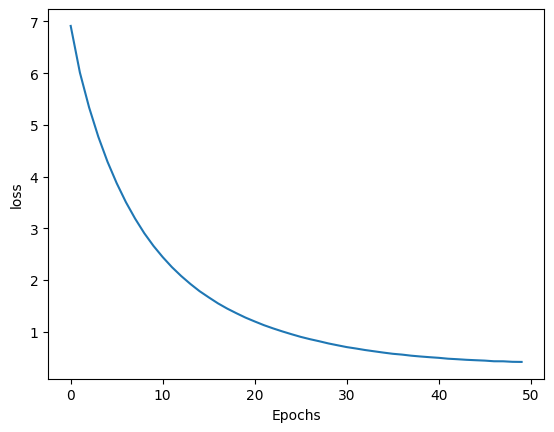

In [13]:
plot_graphs(history, 'loss')

In [14]:
seed_text = "Just forced myself"
next_words = 4 #predict next 4 words

for _ in range(next_words): #iteration makes the next word prediction richer
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
#     predicted = model.predict_classes(token_list, verbose=0)
    predicted=model.predict(token_list)
    predicted=np.argmax(predicted,axis=1) #argmax will let us know the position of highest probablity
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

1/1 [==============================] - 0s 28ms/step


In [15]:
print(seed_text)

Just forced myself to eat a slice
